In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
b_loan=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx","Data")

3. EDA: Study the data distribution in each attribute and target variable, share your
findings.

In [ ]:
loan.nunique()

In [ ]:
(b_loan['Mortgage'].values == 0).sum()


3462

In [ ]:
(b_loan['CCAvg'].values == 0).sum()

106

In [ ]:
collist=['ID', 'Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education','Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'Creditb_loand']
for i in collist:
  print(b_loan[i].value_counts())

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name

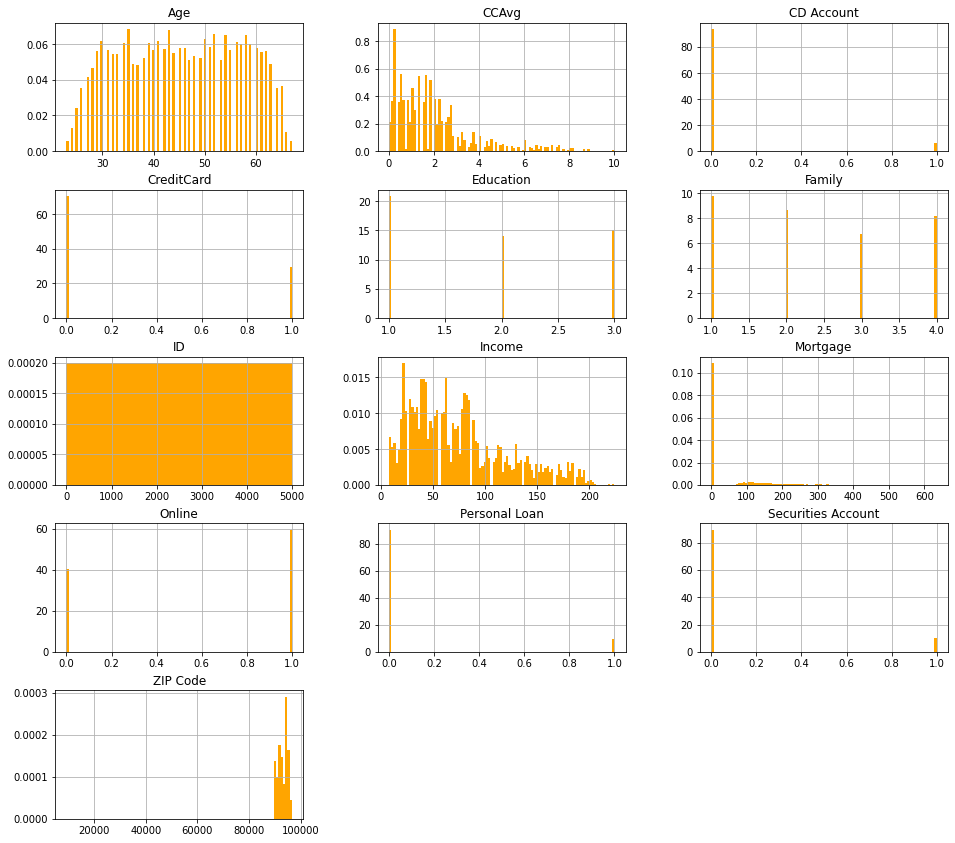

In [ ]:
columns=list(b_loan)
b_loan[columns].hist(stacked=True,density=True, bins=100,color='Orange', figsize=(16,30), layout=(10,3)); 

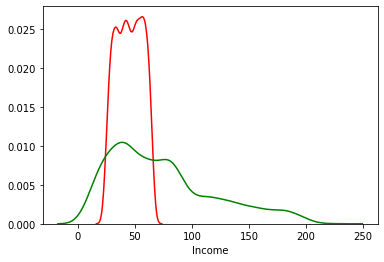

In [ ]:
sns.distplot(b_loan['Age'],kde=True,hist=False,color='Red')
sns.distplot(b_loan['Income'],kde=True,hist=False,color='Green')

plt.show()

In [ ]:
def plot_corr(b_loan, size=10):
    corr = b_loan.corr()
    fig, ax = plt.subplots(figsize=(size, 25))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

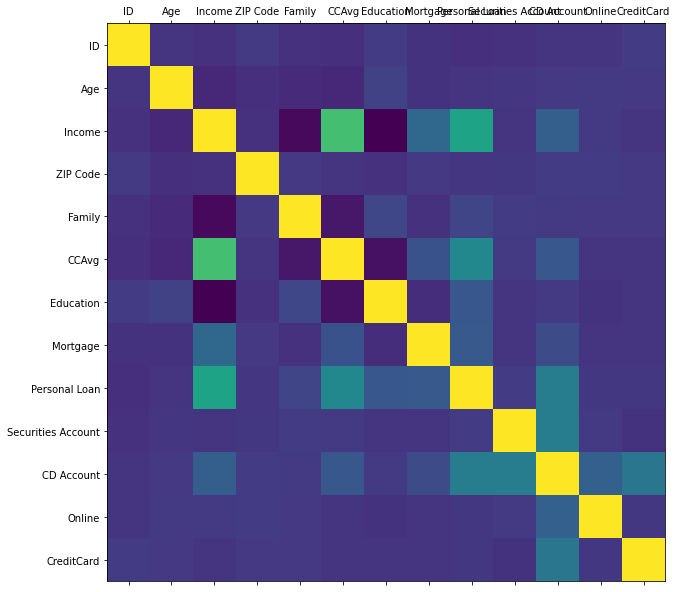

In [ ]:
plot_corr(b_loan)

We could see that Age & Experience are very strongly correlated, Hence it is fine for us to go with Age and drop Experience to avoid multi-colinearity issue.

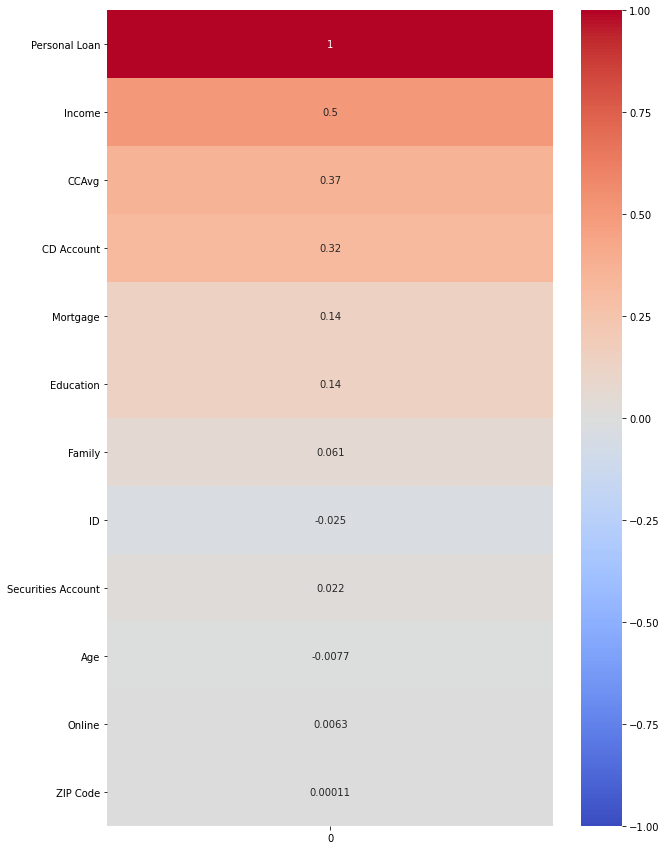

In [ ]:
#correlation between all of the numeric variables in the data frame and the target-personal_loan
#Pandas’ corrwith() method return a pair-wise correlation
correlations = b_loan.corrwith(b_loan['Personal Loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

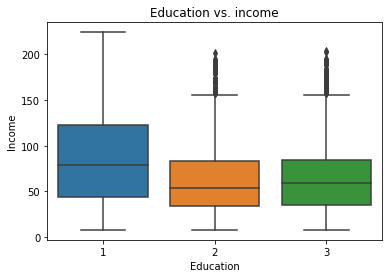

In [ ]:
#correlation with non-numeric column
sns.boxplot(b_loan['Education'],
        b_loan['Income']).set_title('Education vs. income');

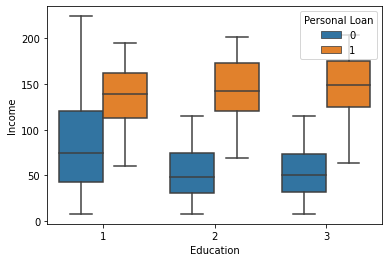

In [ ]:
sns.boxplot(b_loan['Education'],b_loan['Income'],hue=b_loan['Personal Loan']);

From the above plot we could say that Income of customers who availed personal loan are alomst same irrescpective of their Education

Text(0.5, 1.0, 'Income Distribution')

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


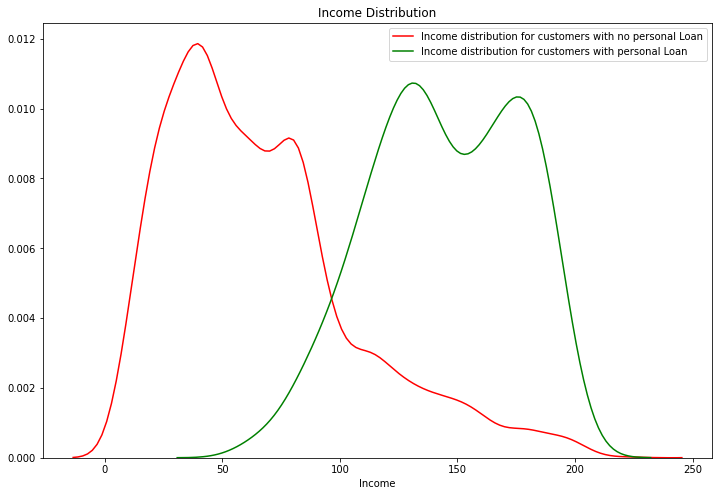

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(b_loan[b_loan['Personal Loan']==0]['Income'],kde=True,color='r',hist=False,label="Income distribution for customers with no personal Loan")
sns.distplot(b_loan[b_loan['Personal Loan']==1]['Income'],kde=True,color='G',hist=False,label="Income distribution for customers with personal Loan")
plt.legend()
plt.title("Income Distribution")

Text(0.5, 1.0, 'CCAvg Distribution')

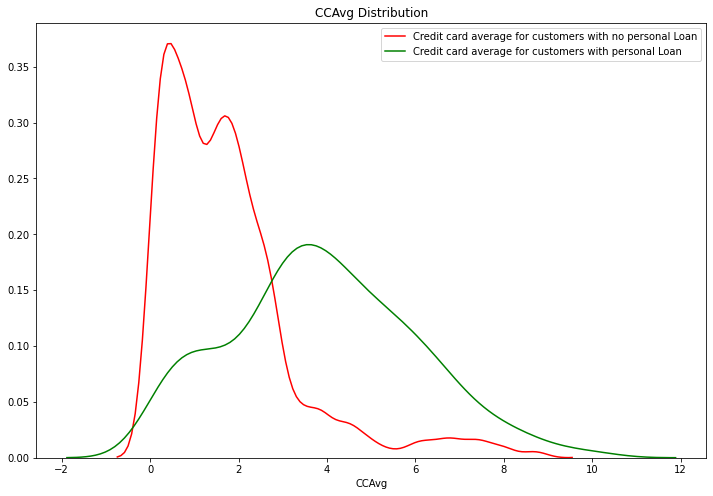

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(b_loan[b_loan['Personal Loan']==0]['CCAvg'],kde=True,hist=False,color='r',label="Credit b_loand average for customers with no personal Loan")
sns.distplot(b_loan[b_loan['Personal Loan']==1]['CCAvg'],kde=True,hist=False,color='G',label="Credit b_loand average for customers with personal Loan")
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Mortgage Distribution')

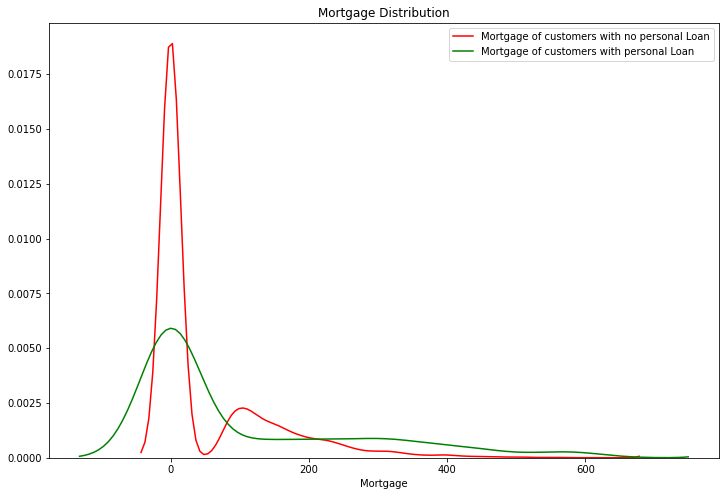

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(b_loan[b_loan['Personal Loan']==0]['Mortgage'],kde=True,hist=False,color='r',label="Mortgage of customers with no personal Loan")
sns.distplot(b_loan[b_loan['Personal Loan']==1]['Mortgage'],kde=True,hist=False,color='G',label="Mortgage of customers with personal Loan")
plt.legend()
plt.title("Mortgage Distribution")

People with high mortgage value, i.e more than 400K have availed personal Loan

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

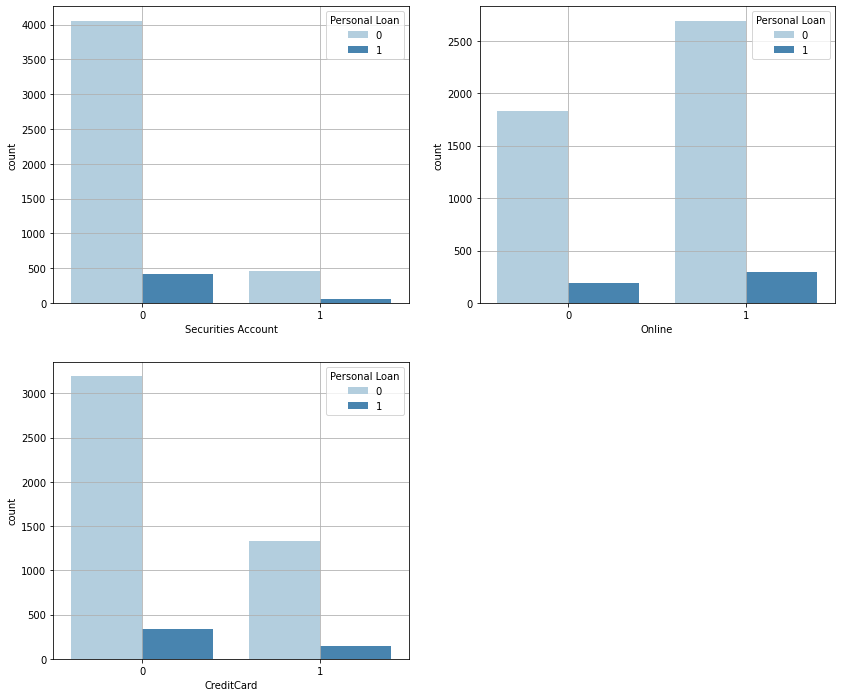

In [ ]:
col_names=['Securities Account','Online','Creditb_loand']

for i in col_names:
    plt.figure(figsize=(14,12))
j=2
k=0
for i in col_names:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan',palette="Blues", data=b_loan)
    k=k+1
    plt.grid(True)
plt.show()

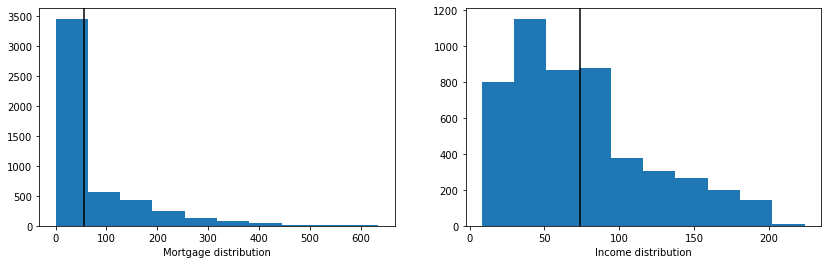

In [ ]:

fig, [ax0, ax1] = plt.subplots(1,2, figsize = (14,4))

ax0.hist(b_loan.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(b_loan.Mortgage.mean(), color = "black")



ax1.hist(b_loan.Income)
ax1.set_xlabel('Income distribution')
ax1.axvline(b_loan.Income.mean(), color = "black");

<Figure size 720x360 with 0 Axes>

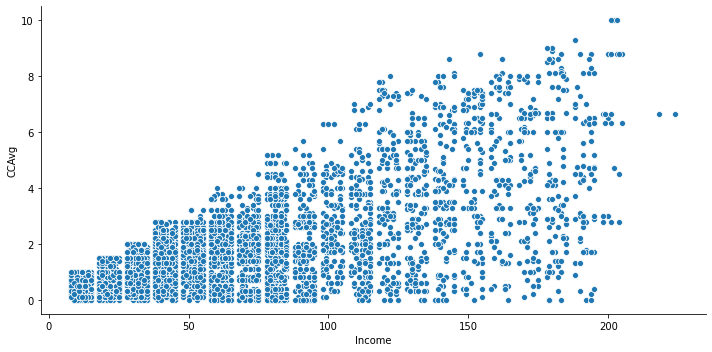

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x="Income", y="CCAvg" ,aspect = 2 ,data=b_loan)
plt.show()
plt.clf()

Income and credit b_loand average use is also related in a linear fashion and is more dense in the income bracket of 50k-100k bracket.

<Figure size 720x360 with 0 Axes>

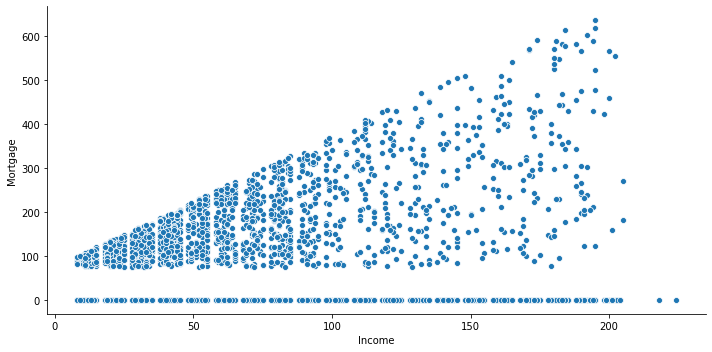

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x="Income", y="Mortgage" ,aspect = 2 ,data=b_loan)
plt.show()
plt.clf()

Income and Mortgage is a linear relation. The datapoints become sparse towards the end which justify that higher income customers have either cleared out mortgages or don't have any

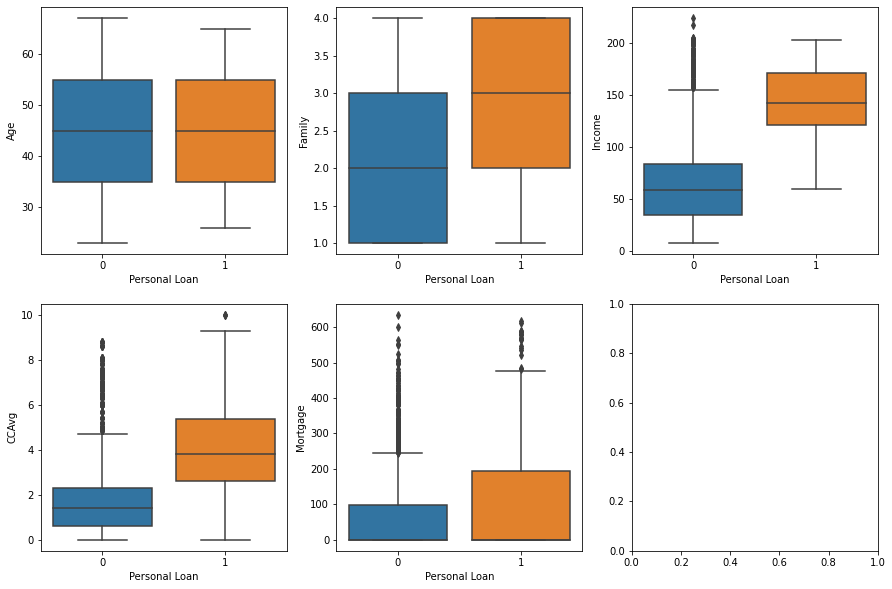

<Figure size 432x288 with 0 Axes>

In [ ]:
numerical = ['Age' ,'Family' ,'Income' , 'CCAvg' , 'Mortgage']
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Personal Loan', y=var, data=b_loan, ax=subplot)
plt.show()
plt.clf()

4. Apply necessary transformations for the feature variables

In [ ]:
X = b_loan[['ID', 'Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account','Online', 'Creditb_loand']].values
y = b_loan['Personal Loan'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

5. Normalise your data and split the data into training and test set in the ratio of 70:30
respectively

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

6. Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans.

In [ ]:
print(b_loan['Personal Loan'].value_counts())
No_of_customers_availed_PL=b_loan[b_loan['Personal Loan']==1].shape[0]
No_of_customers_availed_PL
Total_Cust=b_loan.shape[0]
percet=(No_of_customers_availed_PL * 100)/Total_Cust 
print("Overall percentage of customers who have availed personal Loan:{}".format(percet),"%")

0    4520
1     480
Name: Personal Loan, dtype: int64
Overall percentage of customers who have availed personal Loan:9.6 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Split our Data into Dependent Variables & Independent Variables 

X=b_loan.drop(['Personal Loan'],axis=1)
y=b_loan['Personal Loan']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

NameError: ignored

7. Print all the metrics related for evaluating the model performance

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.10266666666666667
Root Mean Squared Error: 0.3204163957519444
R2 Score: -0.09556037201625789


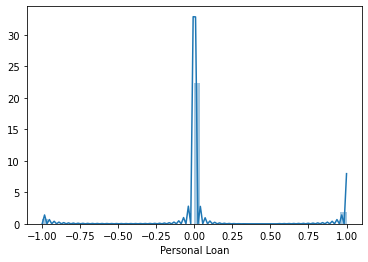

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
b_loan.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
